### Assignment 3 Python
Topic : Balance Sheet analysing for Non-Banking/Financial sector sectors

In [7]:
# !which python


/Users/jagpreetsingh/Documents/AML_2203_1_advanced_python/NSE-BalanceSheet-Analysis-Clustering/venv/bin/python


In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.compose import make_column_selector

***To Ignore Warnings***

In [9]:
import warnings
warnings.catch_warnings()
warnings.simplefilter("ignore")

In [10]:
data = pd.read_csv("./Dataset/balance_sheets/full_non_banking.csv").drop("Id",axis=1)

In [45]:
data.head()

,name,catagory,symbol,linkquate,bs_standalone_link,equity share capital,total share capital,reserves and surplus,total reserves and surplus,total shareholders funds,...,capital goods,expenditure in foreign currency,dividend remittance in foreign currency,fob value of goods,other earnings,bonus equity share capital,non-current investments quoted market value,non-current investments unquoted book value,current investments quoted market value,current investments unquoted book value
0,Carborundum,abrasives,CARBORUNDUM,CU,http://www.moneycontrol.com/financials/carboru...,18.94,18.94,1341.26,1341.26,1367.08,...,19.91,6.81,0.0,391.17,8.31,16.57,0.0,1.15,0.00,61.60
1,Grindwell Norto,abrasives,GRINDWELLNORTO,GN,http://www.moneycontrol.com/financials/grindwe...,55.36,55.36,1121.31,1121.31,1176.67,...,0.00,376.73,0.0,0.00,332.10,51.14,0.8,188.40,0.00,413.89
2,Orient Abrasive,abrasives,ORIENTABRASIVE,OA01,http://www.moneycontrol.com/financials/orienta...,11.97,11.97,220.55,220.55,232.52,...,0.00,11.29,0.0,71.18,0.00,10.47,0.0,0.00,0.00,0.00
3,Wendt,abrasives,WENDT,WI05,http://www.moneycontrol.com/financials/wendt(i...,2.00,2.00,117.66,117.66,119.66,...,1.63,1.37,0.0,39.77,3.48,1.50,0.0,4.31,30.93,0.00
4,Century Extr,aluminium,CENTURYEXTR,CE02,http://www.moneycontrol.com/financials/century...,8.00,8.00,42.46,42.46,50.46,...,0.00,2.80,0.0,0.05,0.00,0.00,0.0,0.00,0.00,0.00


In [46]:
data.tail()

,name,catagory,symbol,linkquate,bs_standalone_link,equity share capital,total share capital,reserves and surplus,total reserves and surplus,total shareholders funds,...,capital goods,expenditure in foreign currency,dividend remittance in foreign currency,fob value of goods,other earnings,bonus equity share capital,non-current investments quoted market value,non-current investments unquoted book value,current investments quoted market value,current investments unquoted book value
1447,Uniinfo Telecom,telecommunicationsservice,UNIINFOTELECOM,UTS,http://www.moneycontrol.com/financials/uniinfo...,10.69,10.69,26.82,26.82,37.52,...,0.00,0.32,0.0,0.00,0.0,6.61,0.00,0.11,0.0,0.00
1448,Vodafone Idea,telecommunicationsservice,VODAFONEIDEA,IC8,http://www.moneycontrol.com/financials/vodafon...,28735.40,28735.40,-19799.70,-19799.70,9001.30,...,0.00,6817.90,0.0,0.00,1765.2,0.00,0.00,0.00,0.0,0.00
1449,Mohota Ind,textilescompositemills,MOHOTAIND,RRM,http://www.moneycontrol.com/financials/mohotai...,14.71,14.71,1.86,159.65,174.36,...,0.00,0.00,0.0,0.00,0.0,0.00,0.00,15.54,0.0,0.00
1450,Nahar Ent,textilescompositemills,NAHARENT,NIE,http://www.moneycontrol.com/financials/naharin...,40.03,146.23,606.41,606.41,752.64,...,0.00,61.02,0.0,209.55,0.0,1.60,0.01,80.23,0.0,0.00
1451,Ruby Mills,textilescompositemills,RUBYMILLS,RM04,http://www.moneycontrol.com/financials/rubymil...,8.36,8.36,464.74,464.74,473.10,...,0.53,0.53,0.0,0.70,0.0,3.33,0.00,0.00,0.0,12.02


In [11]:
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'catagory', 'symbol', 'linkquate', 'bs_standalone_link',
       'equity share capital', 'total share capital', 'reserves and surplus',
       'total reserves and surplus', 'total shareholders funds',
       'long term borrowings', 'deferred tax liabilities [net]',
       'other long term liabilities', 'long term provisions',
       'total non-current liabilities', 'short term borrowings',
       'trade payables', 'other current liabilities', 'short term provisions',
       'total current liabilities', 'total capital and liabilities',
       'tangible assets', 'intangible assets', 'capital work-in-progress',
       'other assets', 'fixed assets', 'non-current investments',
       'deferred tax assets [net]', 'long term loans and advances',
       'other non-current assets', 'total non-current assets',
       'current investments', 'inventories', 'trade receivables',
       'cash and cash equivalents', 'short term loans and advances',
       'othercurrentassets', 'total cu

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1452 entries, 0 to 1451
Data columns (total 53 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   name                                         1452 non-null   object 
 1   catagory                                     1452 non-null   object 
 2   symbol                                       1452 non-null   object 
 3   linkquate                                    1452 non-null   object 
 4   bs_standalone_link                           1452 non-null   object 
 5   equity share capital                         1368 non-null   float64
 6   total share capital                          1368 non-null   float64
 7   reserves and surplus                         1368 non-null   float64
 8   total reserves and surplus                   1368 non-null   float64
 9   total shareholders funds                     1368 non-null   float64
 10  

## Statistical Analysis

In [12]:
## statical information
data.describe()

,equity share capital,total share capital,reserves and surplus,total reserves and surplus,total shareholders funds,long term borrowings,deferred tax liabilities [net],other long term liabilities,long term provisions,total non-current liabilities,...,capital goods,expenditure in foreign currency,dividend remittance in foreign currency,fob value of goods,other earnings,bonus equity share capital,non-current investments quoted market value,non-current investments unquoted book value,current investments quoted market value,current investments unquoted book value
count,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000,...,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000,1.368000e+03,1368.000000
mean,158.079839,161.643713,2493.946981,2498.526572,2664.322032,1514.826696,119.304766,358.471089,218.665782,2211.268216,...,4.803114,1010.977807,0.339474,171.031411,625.268136,47.574883,186.378808,632.340797,2.603509e+03,201.623977
std,970.381401,974.250421,14520.433694,14519.679349,14813.873810,12885.826751,1609.412888,3535.135601,3513.618053,15528.318769,...,57.216391,11148.765711,6.812689,2232.299583,8668.927627,365.190787,1927.300115,10736.336583,9.220732e+04,1513.763951
min,1.000000,1.000000,-34329.000000,-34329.000000,-32946.000000,0.000000,-6.040000,0.000000,0.000000,-0.020000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,12.982500,13.107500,75.427500,79.350000,106.337500,0.000000,0.000000,0.070000,0.217500,13.070000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
50%,25.000000,25.345000,371.425000,375.025000,419.935000,11.725000,0.000000,4.855000,2.475000,69.350000,...,0.000000,3.145000,0.000000,0.000000,0.000000,0.975000,0.000000,1.500000,0.000000e+00,0.000000
75%,71.087500,72.665000,1312.200000,1315.485000,1416.417500,138.422500,12.395000,37.122500,12.252500,303.225000,...,0.000000,76.707500,0.000000,0.000000,26.222500,10.887500,0.000000,82.577500,0.000000e+00,0.000000
max,28735.400000,28735.400000,418244.000000,418244.000000,424583.000000,286340.480000,50556.000000,80374.580000,88036.750000,286522.600000,...,1335.180000,267121.920000,224.000000,77974.000000,284196.000000,9037.980000,42534.940000,391801.000000,3.410200e+06,38216.000000


### Observations
- columns `'equity share capital'` and `'total share capital'`, and `'reserves and surplus'` and `'total reserves and surplus'` looks alot similar, moving ahead in the EDA we can visualise and see if they are very highly correlated and move ahead with taking one from the pair.
- One Interesting observation here is, the `minimum` values for some of the columns are `negative`.

### Data Exploration

Percentage of missing values:
name                                           0.000000
catagory                                       0.000000
symbol                                         0.000000
linkquate                                      0.000000
bs_standalone_link                             0.000000
equity share capital                           0.057851
total share capital                            0.057851
reserves and surplus                           0.057851
total reserves and surplus                     0.057851
total shareholders funds                       0.057851
long term borrowings                           0.057851
deferred tax liabilities [net]                 0.057851
other long term liabilities                    0.057851
long term provisions                           0.057851
total non-current liabilities                  0.057851
short term borrowings                          0.057851
trade payables                                 0.057851
other current liab

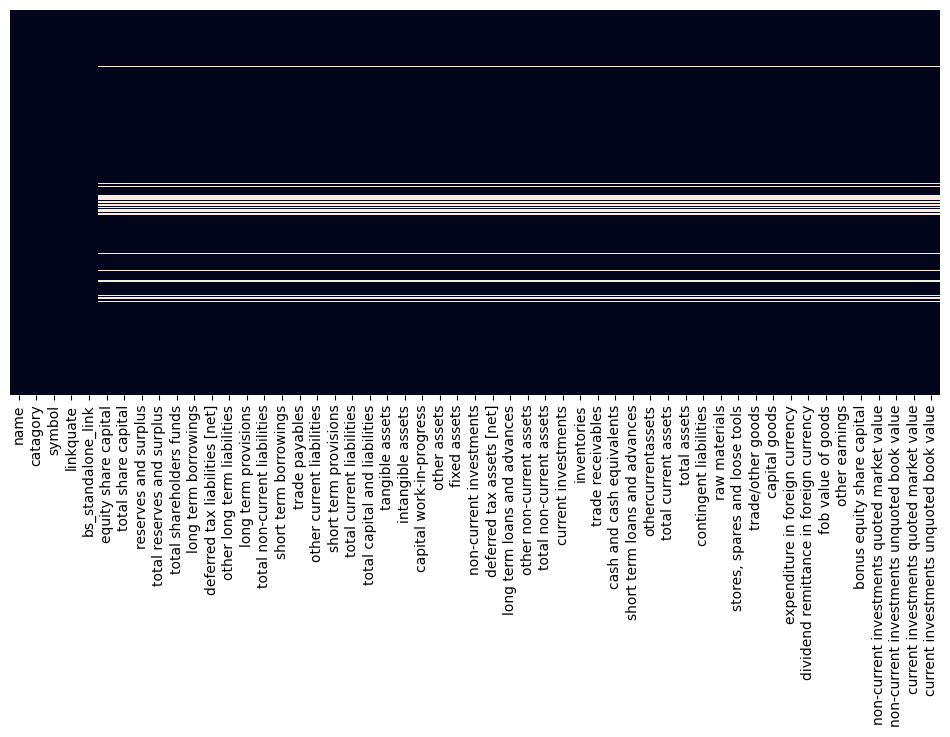

In [53]:
## Check null values
data.isnull().mean()*100
plt.figure(figsize=(12,5))
print(f"Percentage of missing values:\n{data.isnull().mean()}")
sb.heatmap(data.isnull(),fmt=".2f",yticklabels=False,cbar=False)
plt.show()

## Observation:
- the missing values for all columns are ~5.8% and the heat map shoes the missing values are consistent through the records, hence we can afford to completely ignore the missing values and go ahead and droping them.

In [57]:
# drop missing values
print(f"Shape of original data: {data.shape}")
data.dropna(inplace=True)
print(f"Shape of data after deleting missing values: {data.shape}")

Shape of original data: (1368, 53)
Shape of data after deleting missing values: (1368, 53)


In [20]:
## defining categorical and numerical columns

num_col_selector = make_column_selector(dtype_include='float64')
num_cols = num_col_selector(data)

### not including columns such as 'name', 'symbol', 'linkquate', 'bs_standalone_link' as these are merely used to indentify the records and does not contribute any thing to our analysis.
cat_cols = ['catagory']
len(num_cols)

48

### Observation
- Not including columns such as `'name'`, `'symbol'`, `'linkquate'`, `'bs_standalone_link'` as these are merely used to indentify the records and does not contribute any thing to our analysis.


## Exploratory Data Analysis(EDA)

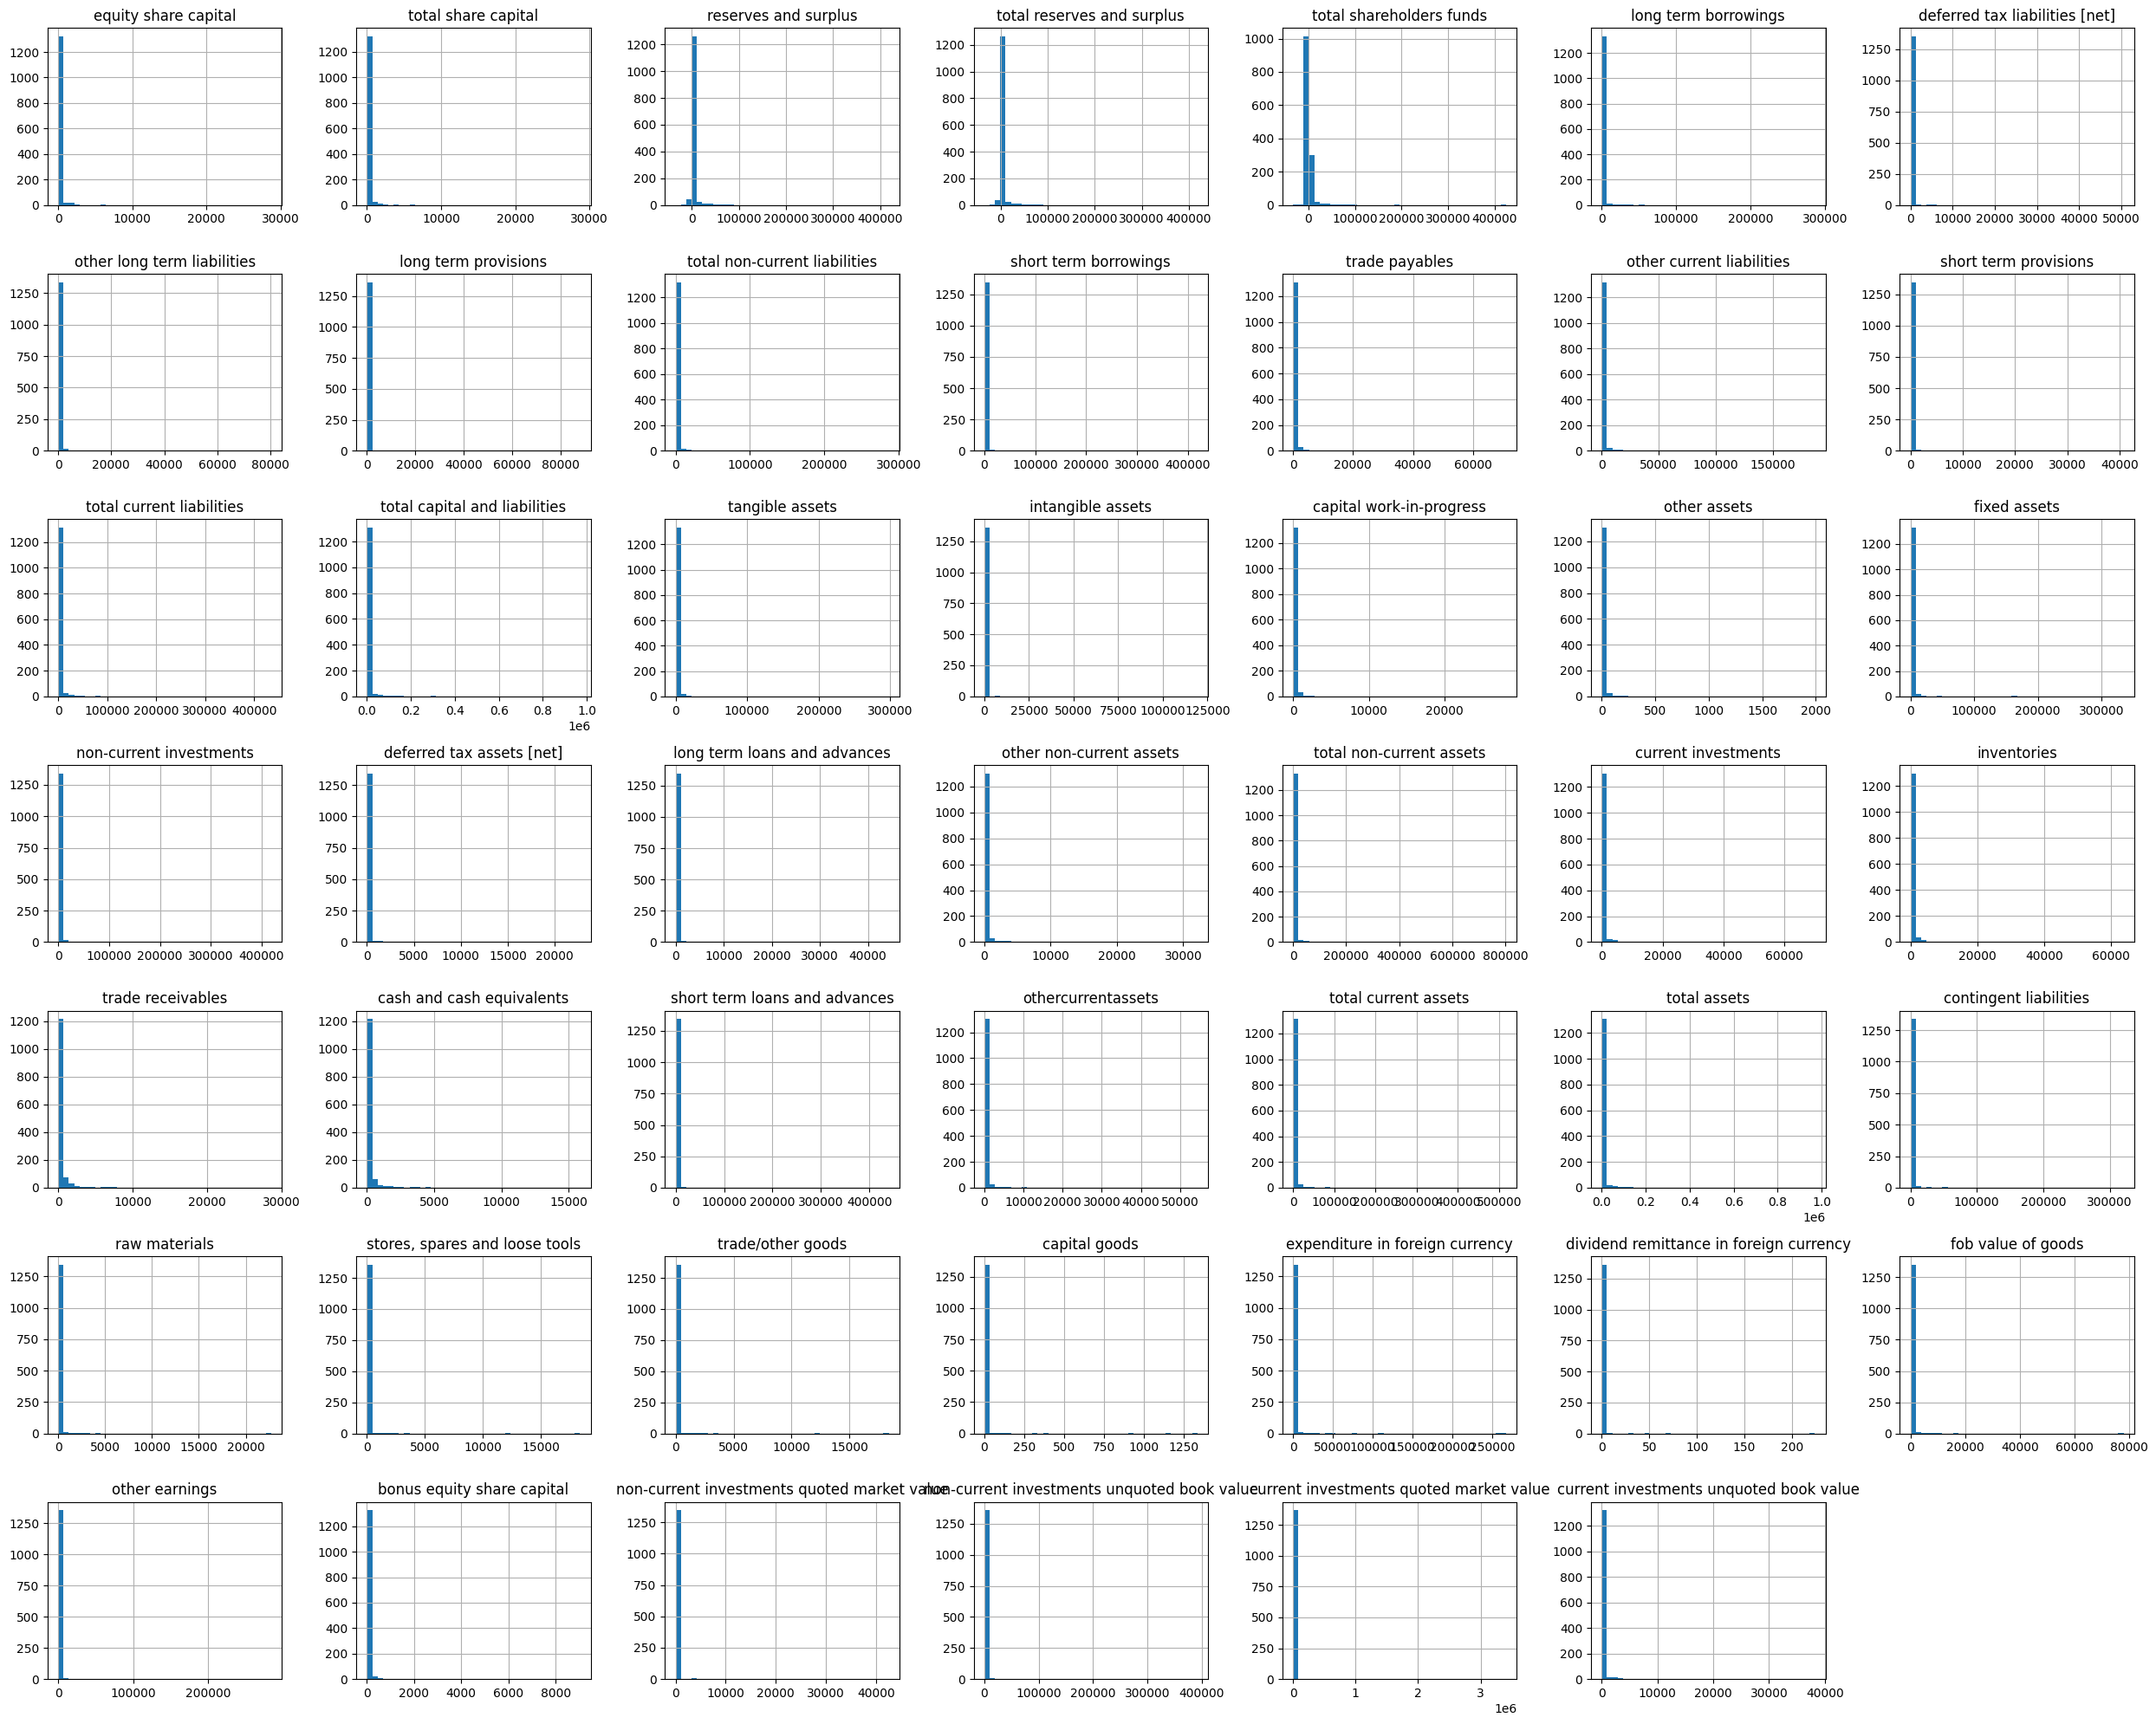

In [174]:
## visualise the data 
data.hist(bins=40,figsize=(25,20))
plt.tight_layout()
plt.show()

## Categorical Columns

In [175]:
catagories = data['catagory'].unique()
print(f"Categories:{catagories}")


Categories:['abrasives' 'aluminium' 'aquaculture' 'auto23wheelers' 'autocarsjeeps'
 'autotractors' 'autoancillaries' 'bearings' 'breweriesdistilleries'
 'cablestelephone' 'castingsforgings' 'cementmajor' 'cementmini'
 'chemicals' 'cigarettes' 'compressors' 'computershardware'
 'computerssoftware' 'computerssoftwaretraining'
 'constructioncontractingcivil' 'constructioncontractinghousing'
 'constructioncontractingrealestate' 'consumergoodselectronic'
 'consumergoodswhitegoods' 'couriers' 'diversified' 'domesticappliances'
 'drycells' 'dyespigments' 'edibleoilssolventextraction'
 'electricequipment' 'electricals' 'engineering' 'engineeringheavy'
 'engines' 'textilesdenim' 'textilesgeneral' 'textilesmachinery'
 'textilesmanmade' 'textilesprocessing' 'textilesreadymadeapparels'
 'textilesspinningcottonblended' 'textilesspinningsyntheticblended'
 'textilesweaving' 'trading' 'transportlogistics' 'tyres' 'fasteners'
 'fertilisers' 'financegeneral' 'financehousing' 'financeinvestments'
 'finan

In [176]:
## function to set labels for plots
def plot_labels(plot, x_label=None,y_label=None,title=None):
    """
    """
    plt.figure(figsize=(8,6))
    plot.set_xlabel(x_label)
    plot.set_ylabel(y_label)
    plot.set_title(title,fontdict={'fontsize':15})
    plt.tight_layout()



Top Categories with count:
catagory
miscellaneous                   126
pharmaceuticals                  80
chemicals                        57
autoancillaries                  56
mediaentertainment               42
constructioncontractingcivil     41
financeinvestments               40
diversified                      39
computerssoftware                36
financegeneral                   34
Name: count, dtype: int64


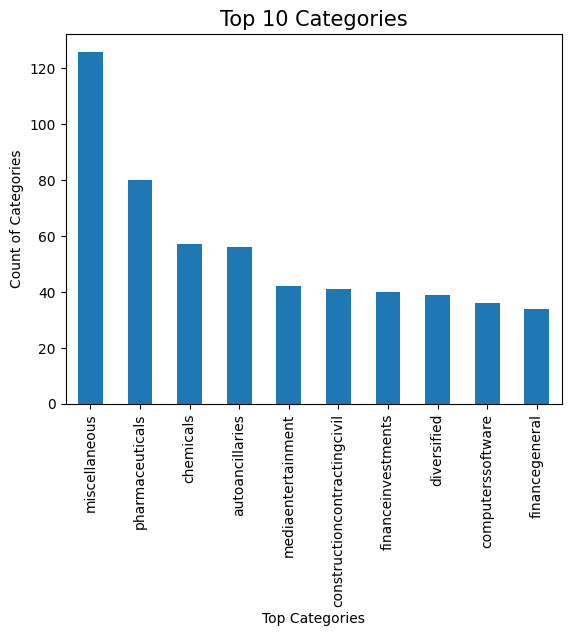

<Figure size 800x600 with 0 Axes>

In [170]:

## top 10 categories
print(f"Top Categories with count:\n{data['catagory'].value_counts().head(10)}")
fig1 = data['catagory'].value_counts().head(10).plot(kind='bar')
plot_labels(fig1,x_label='Top Categories',y_label='Count of Categories',title='Top 10 Categories')
plt.show()

### Data selection:
1. Remove unnecessary columns.

In [61]:
cat_cols

['catagory']

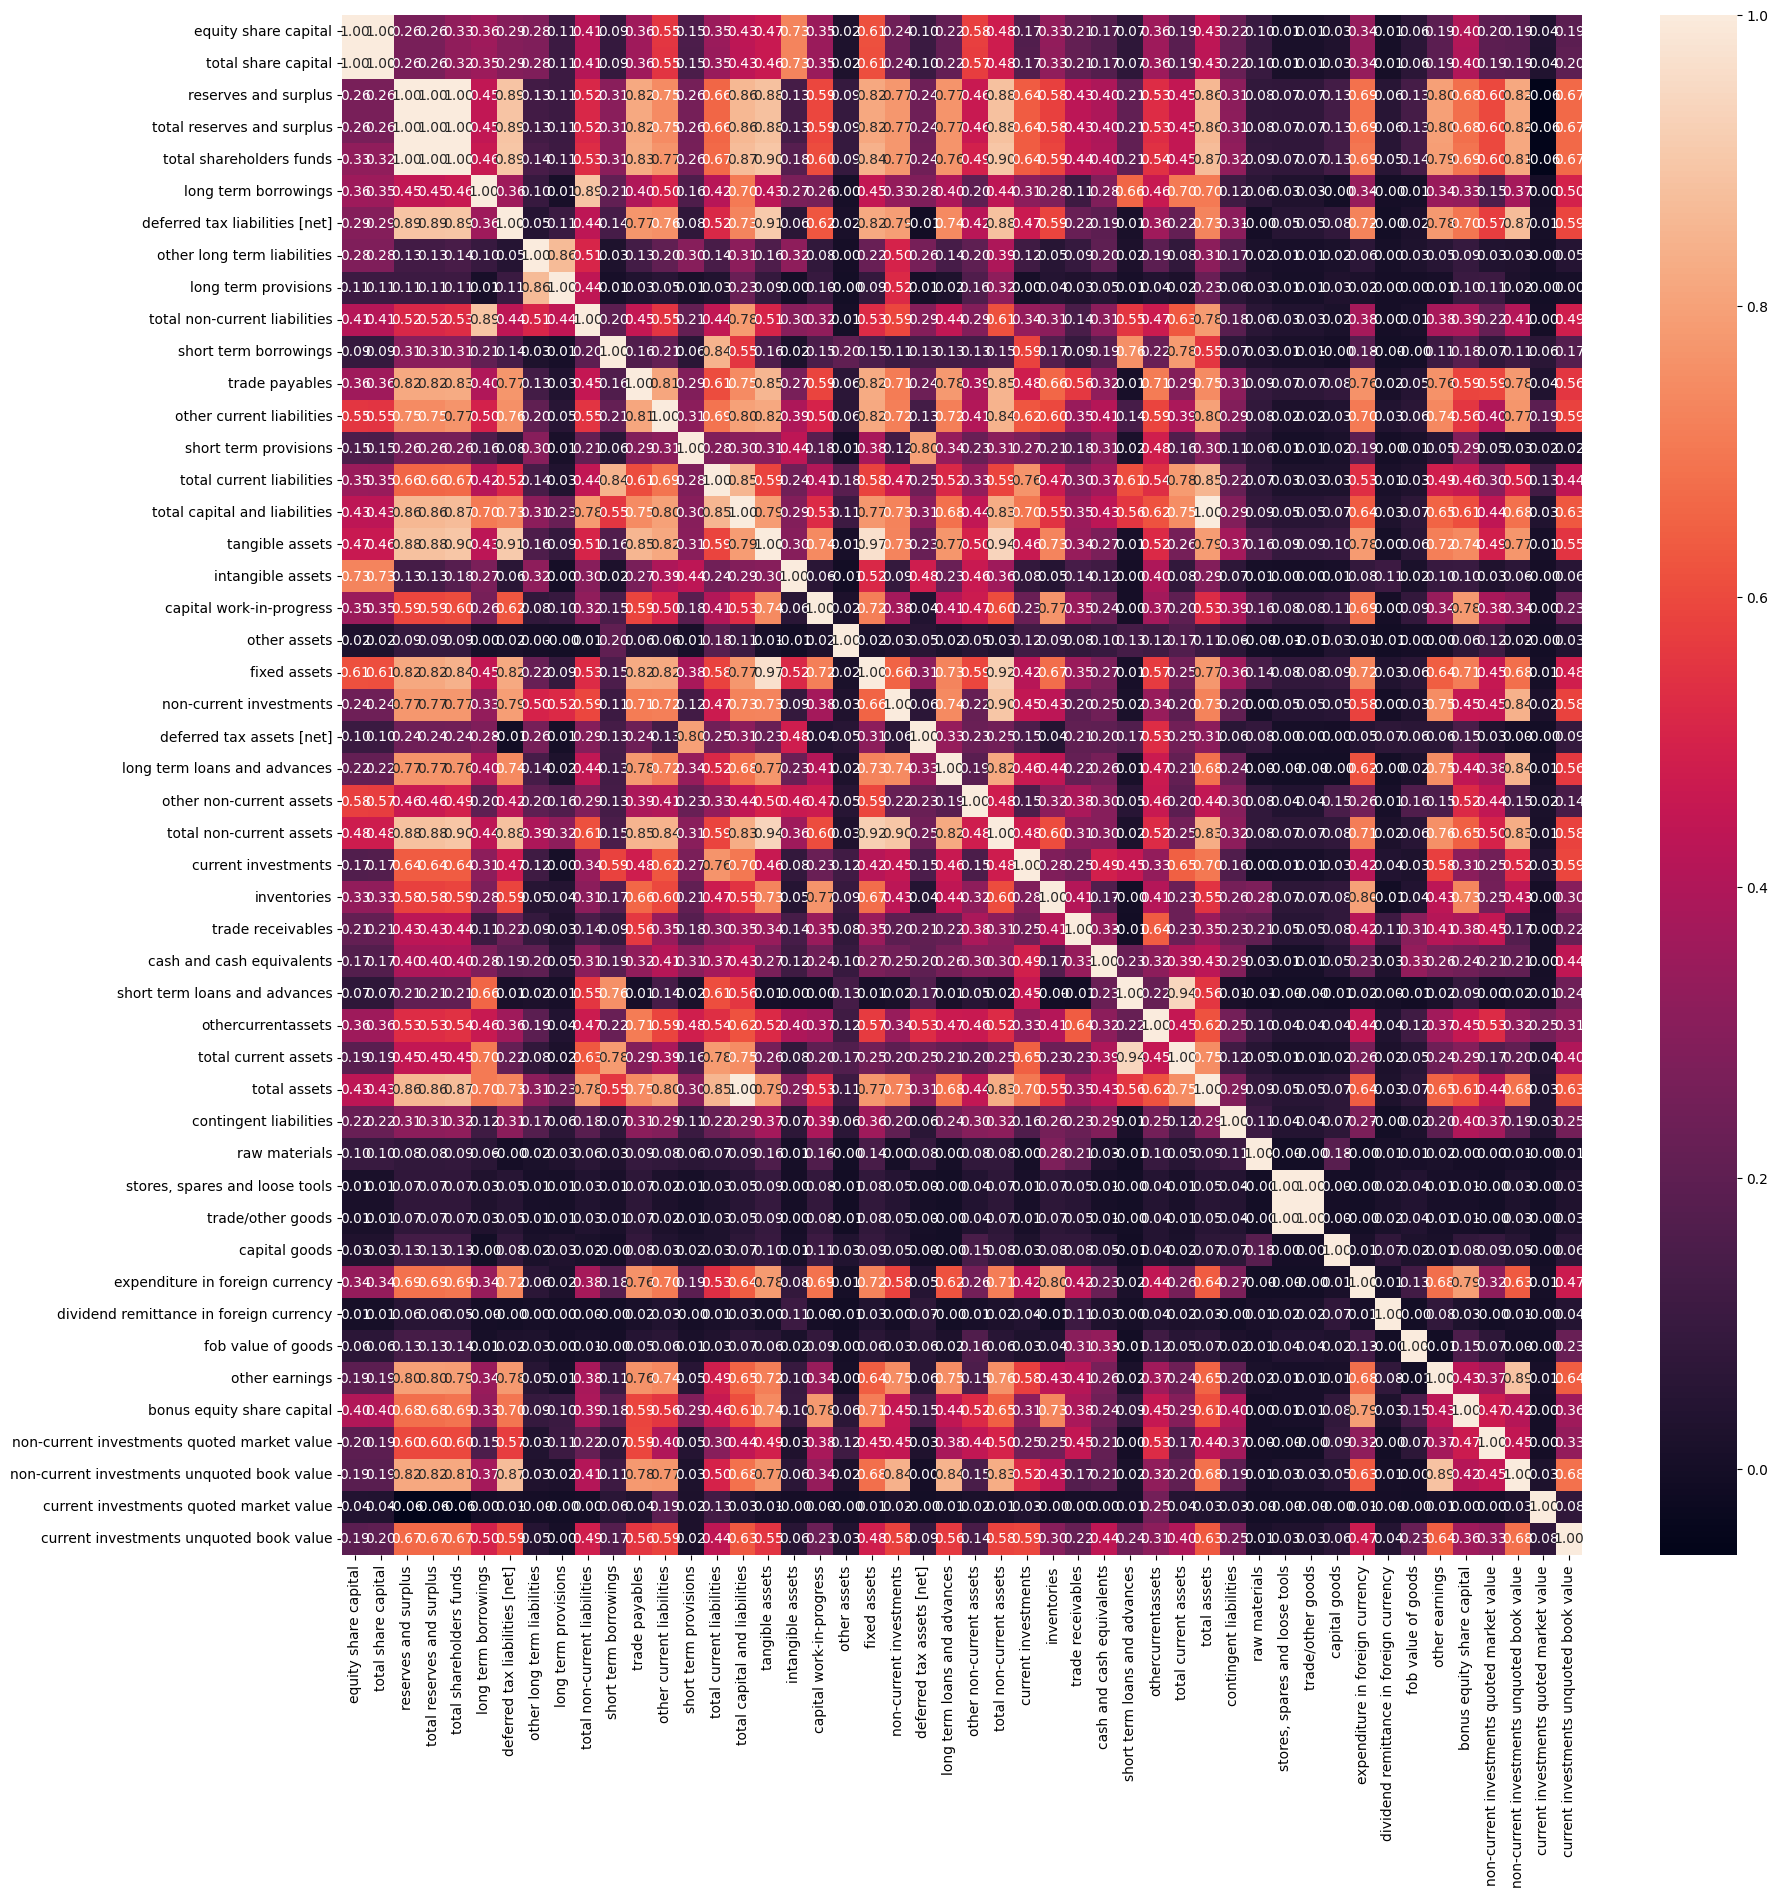

In [21]:
corr = data[num_cols].corr()
plt.figure(figsize=(20,20))
sb.heatmap(corr,annot=True,fmt=".2f")
plt.show()


To filter out the columns that are highly correlated in the given correlation matrix, you can set a correlation threshold and exclude the columns that have correlation values above this threshold. By doing so, you'll keep only the columns that have correlations below the threshold, indicating a weaker correlation.

In [80]:
def get_correlated_columns(data_frame, threshold=0.8):
    if not isinstance(data_frame, pd.DataFrame):
        raise ValueError("Input must be a pandas DataFrame.")
    
    # Calculate the correlation matrix
    corr_matrix = data_frame.corr()
    
    # Find highly positively correlated columns
    highly_pos_corr_columns = corr_matrix.columns[corr_matrix.iloc[0] > threshold]
    
    # Find highly negatively correlated columns
    highly_neg_corr_columns = corr_matrix.columns[corr_matrix.iloc[0] < -threshold]
    
    # Combine both lists to get the final list of columns to exclude
    return [col for col in set(highly_pos_corr_columns).union(set(highly_neg_corr_columns))]
    


related_cols = get_correlated_columns(data[num_cols],0.4)
print(len(related_cols))

12


In [81]:
related_cols

['total capital and liabilities',
 'intangible assets',
 'fixed assets',
 'total non-current liabilities',
 'other current liabilities',
 'total non-current assets',
 'bonus equity share capital',
 'total share capital',
 'equity share capital',
 'total assets',
 'other non-current assets',
 'tangible assets']

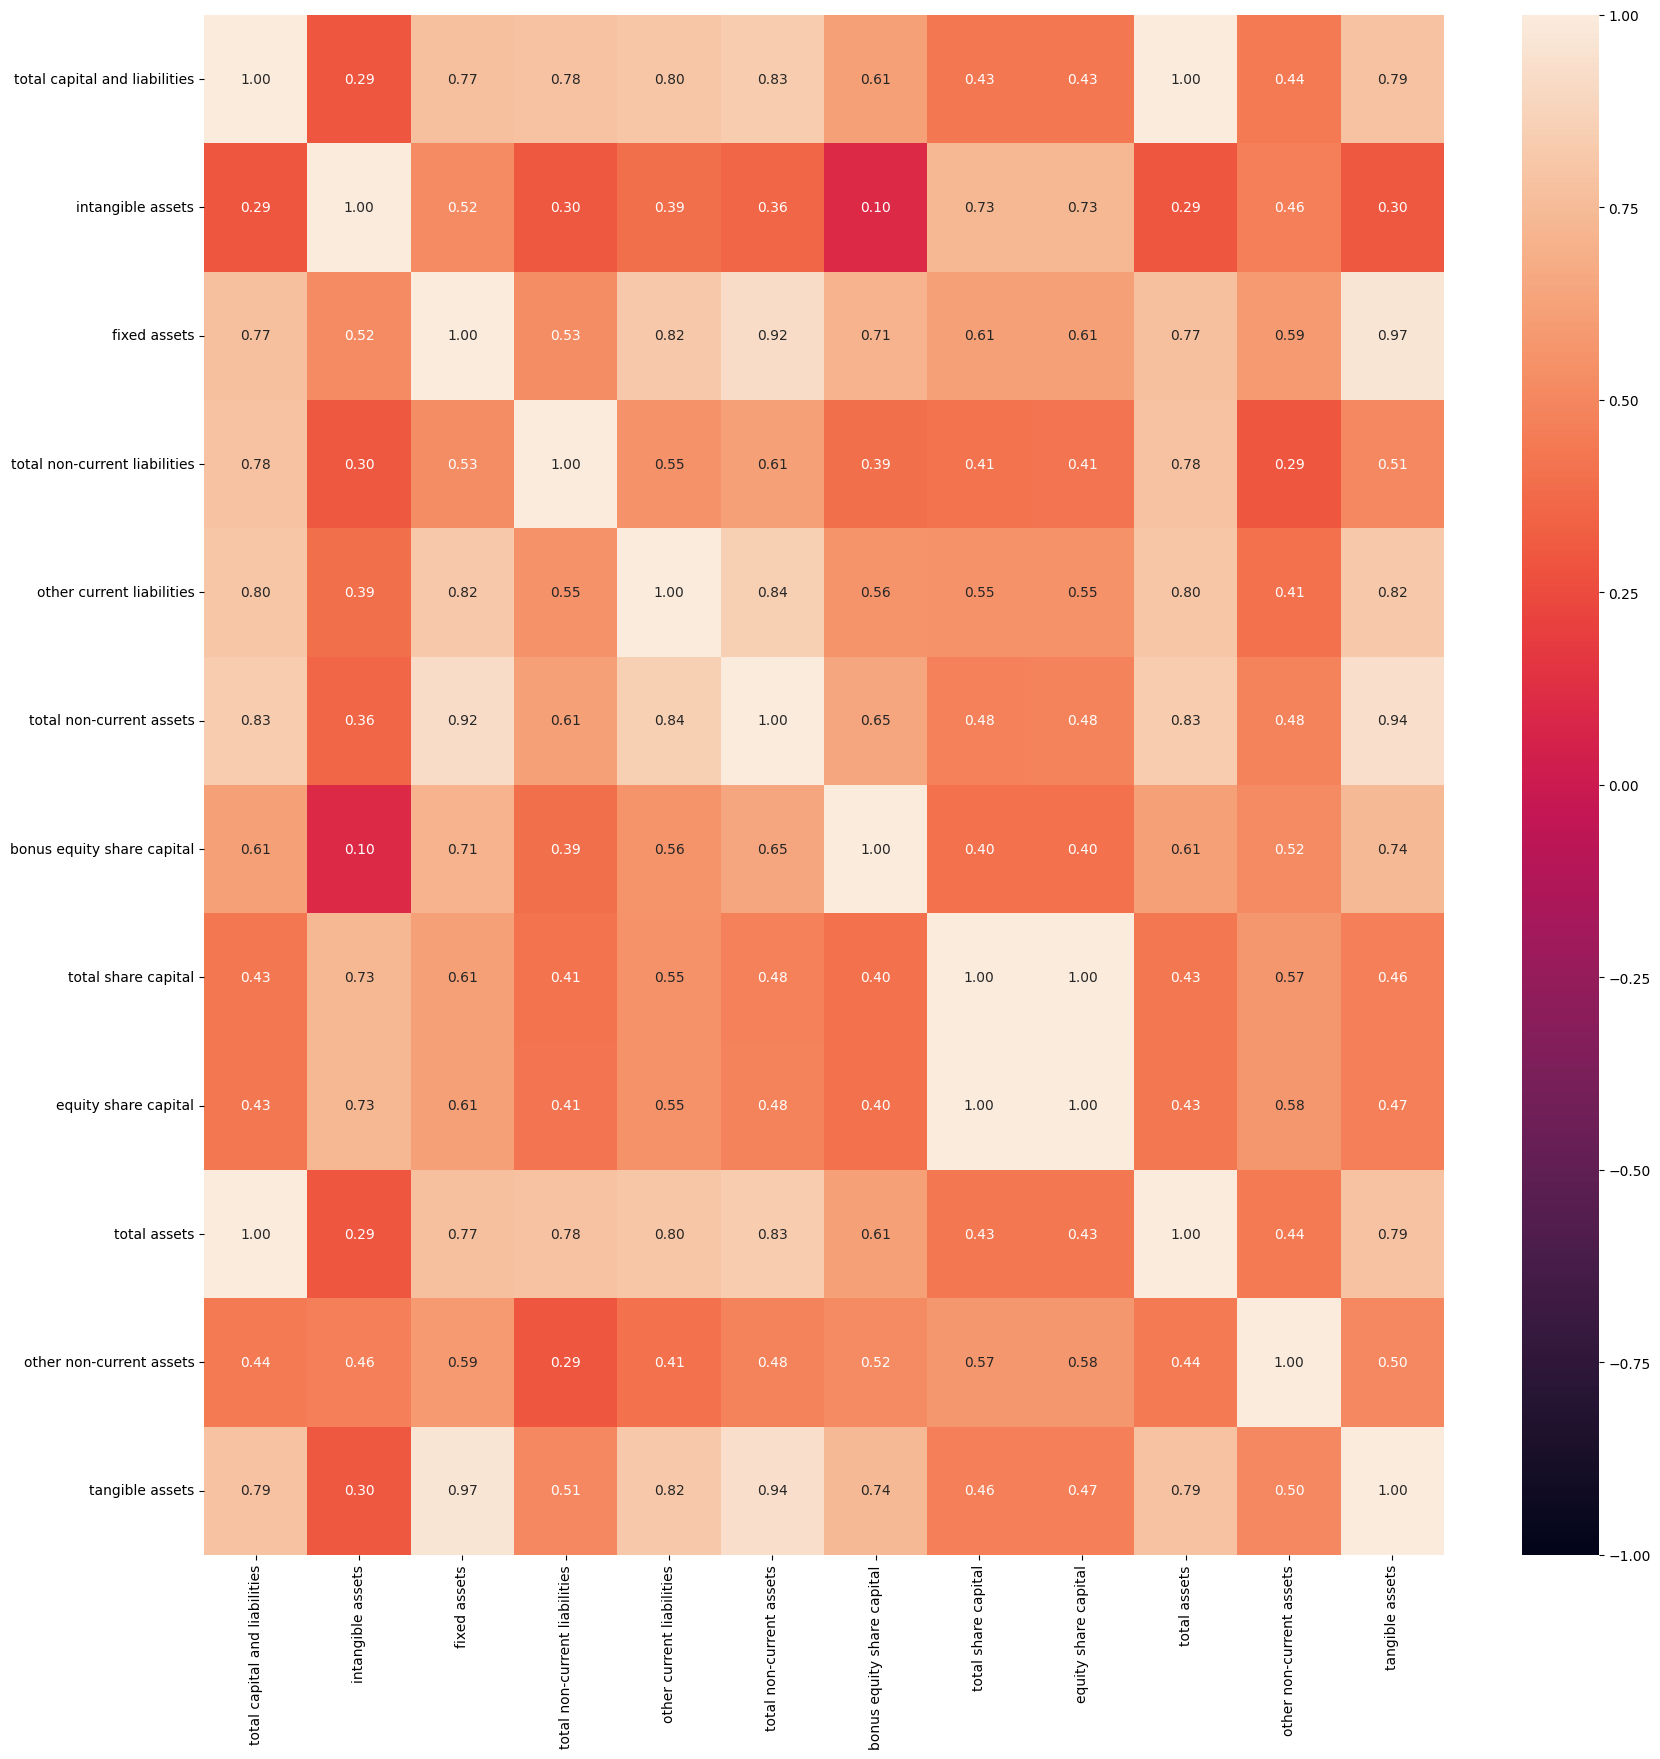

In [82]:

plt.figure(figsize=(20,20))
sb.heatmap(data[related_cols].corr(),annot=True,fmt=".2f",vmin=-1,vmax=1)
plt.show()

In [83]:
cols = related_cols+cat_cols

In [84]:
X = data[cols]
X.rename(columns={'catagory':'category'},inplace=True)
X.shape

(1368, 13)

### Preprocessing data

In [85]:
## Missing values

X.dropna(inplace=True,axis=0)
X.shape

(1368, 13)

In [86]:
## Label Encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
X['category'] = label_encoder.fit_transform(X['category'])

In [87]:
## Scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
process_data = scaler.fit_transform(X)
print(f"shape of the data after scalling:{process_data.shape}")

shape of the data after scalling:(1368, 13)


### Transform into different dimentials

In [88]:
from sklearn.manifold import TSNE
tnse = TSNE(n_components=2,n_jobs=-1)
bs_2d_tr = tnse.fit_transform(process_data)
bs_2d_tr.shape

(1368, 2)

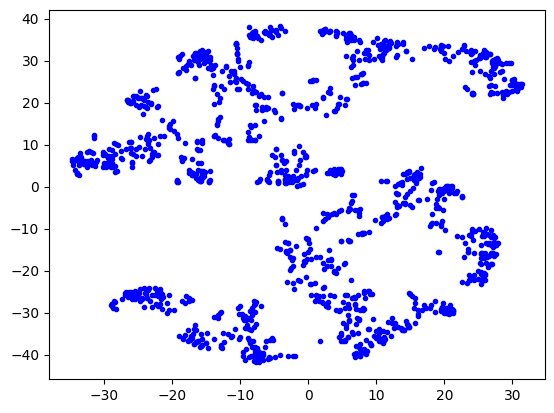

In [94]:
plt.plot(bs_2d_tr[:,0],bs_2d_tr[:,1],"b.")

### Apply Kmean clusting 

In [95]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6)
kmeans.fit(bs_2d_tr)

KMeans(n_clusters=6)

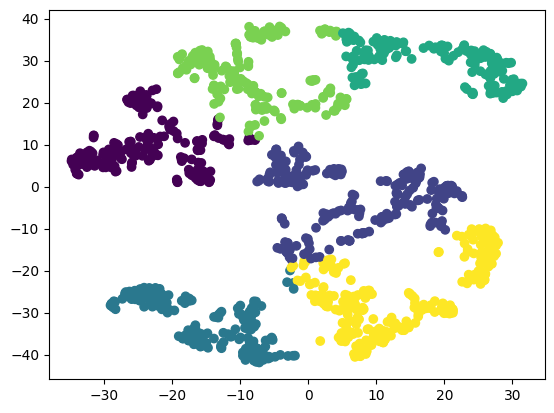

In [96]:
plt.scatter(bs_2d_tr[:,0],bs_2d_tr[:,1],c=kmeans.labels_)

### Apply DB Scan algorithm

In [97]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(n_jobs=-1)
clusters = dbscan.fit_predict(process_data)

In [98]:
np.unique(clusters,return_counts=True)

(array([-1,  0]), array([ 132, 1236]))

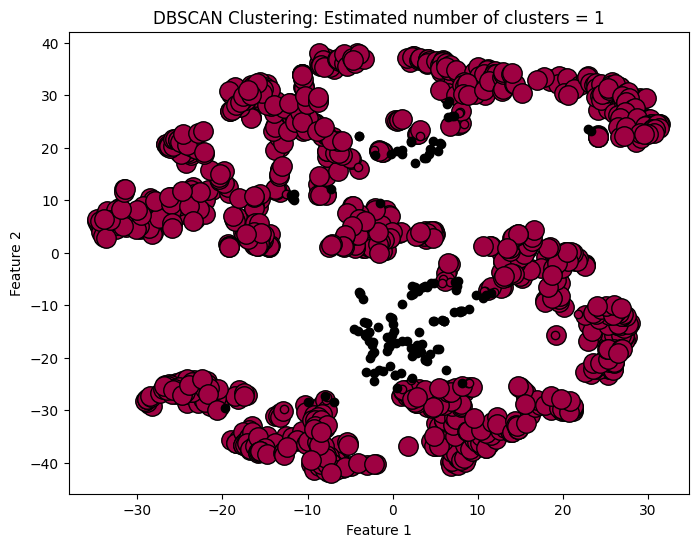

In [99]:
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
labels = dbscan.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# Plot the DBSCAN result
plt.figure(figsize=(8, 6))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = bs_2d_tr[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)

    xy = bs_2d_tr[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

plt.title(f"DBSCAN Clustering: Estimated number of clusters = {n_clusters_}")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [100]:
def plot_dbscan(dbscan,X = X,size=400):
    core_mask = np.zeros_like(dbscan.labels_,dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anormal_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anormal_mask)
    plt.scatter(X[anormal_mask,0],X[anormal_mask,1],marker="x",color='r',s=50,label="anormal")
    plt.scatter(X[core_mask,0],X[core_mask,1],c=dbscan.labels_[core_mask])
    plt.scatter(X[core_mask,0],X[core_mask,1],c=dbscan.labels_[core_mask],s=size,cmap=plt.cm.Paired,zorder=-1,alpha=.4)
    plt.scatter(X[non_core_mask,0],X[non_core_mask,1],marker=".",c=dbscan.labels_[non_core_mask])
    plt.legend()
    plt.title("eps={:.2f} min_sample={}".format(dbscan.eps,dbscan.min_samples))

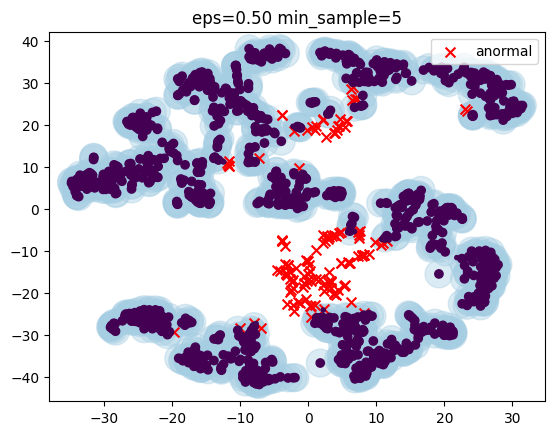

In [101]:
plot_dbscan(dbscan,bs_2d_tr)

### 

In [102]:
from sklearn.cluster import MiniBatchKMeans
import time
ks = range(1,50)
r_inertias = []
m_inertias = []

r_times = []
m_times = []

for k in ks:
    miniKmean = MiniBatchKMeans(n_clusters=k)
    regular_kmean = KMeans(n_clusters=k)
    t1 = time.time()
    regular_kmean.fit(bs_2d_tr)
    t2 = time.time()
    r_times.append(t2-t1)
    r_inertias.append(regular_kmean.inertia_)
    t1 = time.time()
    miniKmean.fit(bs_2d_tr)
    t2 = time.time()
    m_times.append(t2-t1)
    m_inertias.append(miniKmean.inertia_)
    

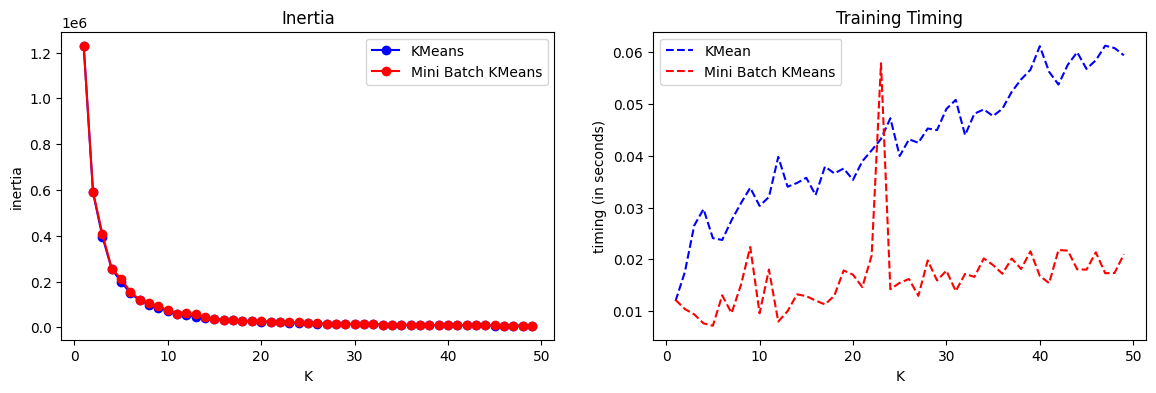

In [103]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(ks,r_inertias,'bo-',label="KMeans")
plt.plot(ks,m_inertias,'ro-',label="Mini Batch KMeans")
plt.title("Inertia")
plt.xlabel("K")
plt.ylabel("inertia")
plt.legend()
plt.subplot(122)
plt.plot(ks,r_times,"b--",label="KMean")
plt.plot(ks,m_times,"r--",label="Mini Batch KMeans")
plt.title("Training Timing")
plt.xlabel("K")
plt.ylabel("timing (in seconds)")
plt.legend()

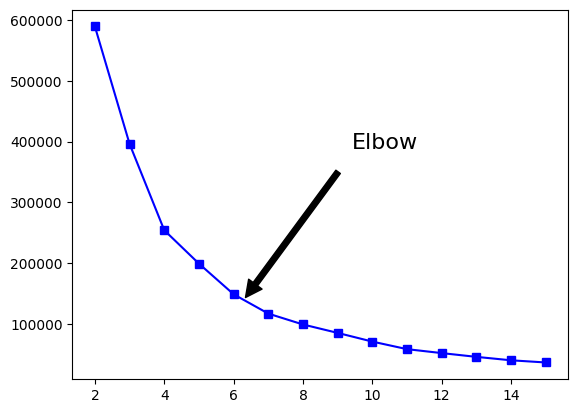

In [104]:
plt.plot(ks[1:15],r_inertias[1:15],"bs-")
plt.annotate("Elbow",xy=[6,r_inertias[6]],xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.show()

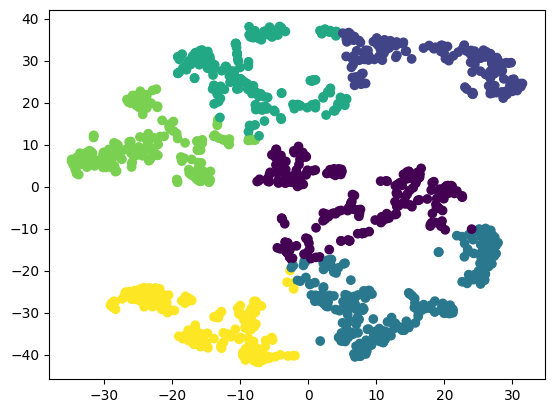

In [105]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(bs_2d_tr)
plt.scatter(bs_2d_tr[:,0],bs_2d_tr[:,1],c=kmeans.labels_)


In [106]:
from sklearn.metrics import silhouette_score
ks = range(2,10)
silhouetes = []
for k in ks:
    km = KMeans(n_clusters=k)
    km.fit(bs_2d_tr)
    silhouetes.append(silhouette_score(bs_2d_tr,km.labels_))

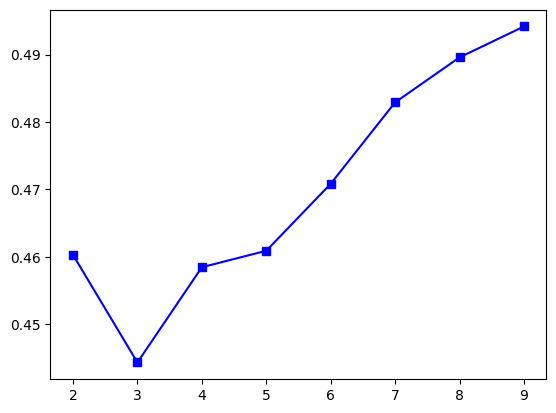

In [107]:
plt.plot(ks,silhouetes,"bs-")

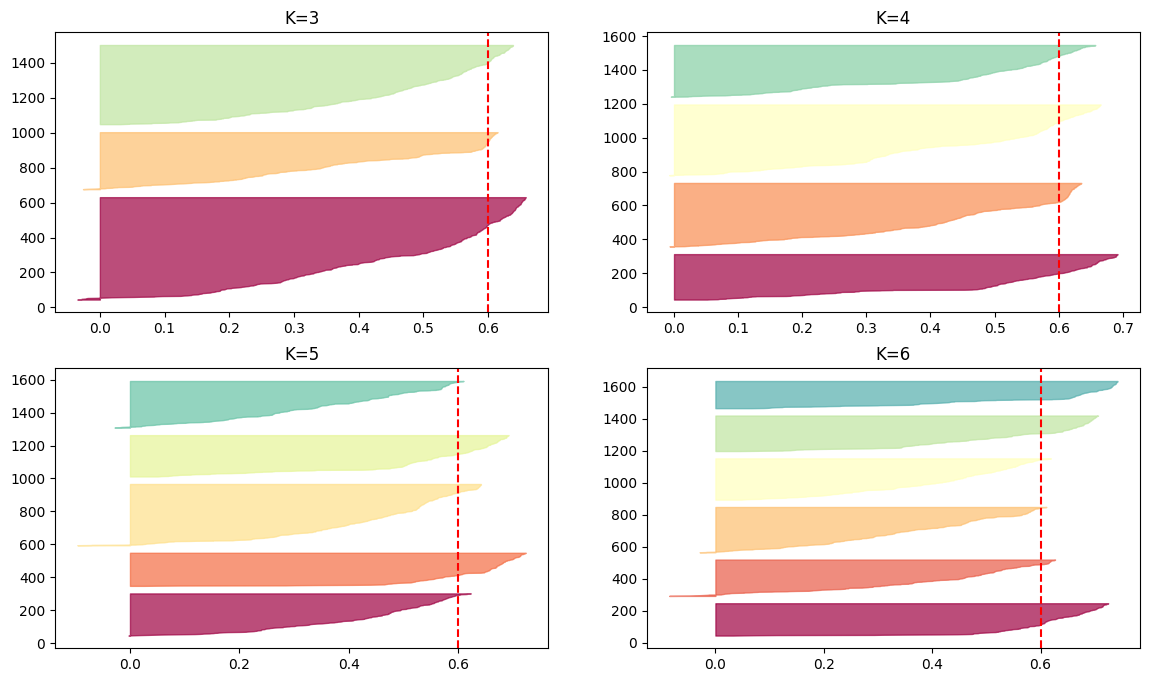

In [108]:
from sklearn.metrics import silhouette_samples
plt.figure(figsize=(14,8))
for k in (3,4,5,6):
    plt.subplot(2,2,k-2)
    k3 = KMeans(n_clusters=k)
    ypred = k3.fit_predict(bs_2d_tr)
    padding = len(bs_2d_tr)//30
    pos = padding
    silhouete_coef = silhouette_samples(bs_2d_tr,ypred)
    for i in range(k):
        coef = silhouete_coef[ypred==i]
        coef.sort()
        color = plt.cm.Spectral(i/k)
        plt.fill_betweenx(np.arange(pos,pos+len(coef)),0,coef,facecolor=color,edgecolor=color,alpha=.7)
        pos += len(coef) +padding
    plt.axvline(x=0.6,linestyle="--",color="red")
    plt.title("K="+str(k))